**Import necessary Python Libraries.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Create the data frame.**

In [4]:
data = pd.read_csv("zomato_data.csv")
print(data.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Convert the data type of the "rate" column to float and remove the denominator.

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

data['rate'] = data['rate'].apply(handleRate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


To obtain a summary of the dataframe.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


There is no **NULL** value in the dataframe.

Explore the listed_in(type) column.

Text(0.5, 0, 'Type of Restaurant')

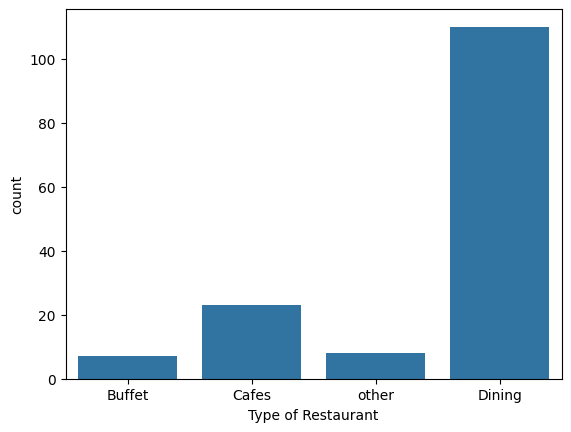

In [7]:
sns.countplot(x = data['listed_in(type)'])
plt.xlabel("Type of Restaurant")

**Conclusion:** The majority of the restaurants fall into the dining category.

Text(0, 0.5, 'Votes')

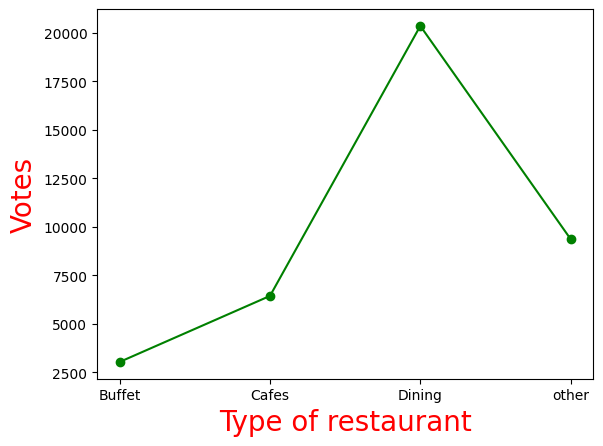

In [9]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

**Conclusion:** Dining Restaurants are preferred by a large number of individuals.

Determine the Restaurant's name that received the maximum votes based on the given dataframe.

In [10]:
max_votes = data['votes'].max()
restaurant_with_max_votes = data.loc[data['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


Explore the online order column.

<Axes: xlabel='online_order', ylabel='count'>

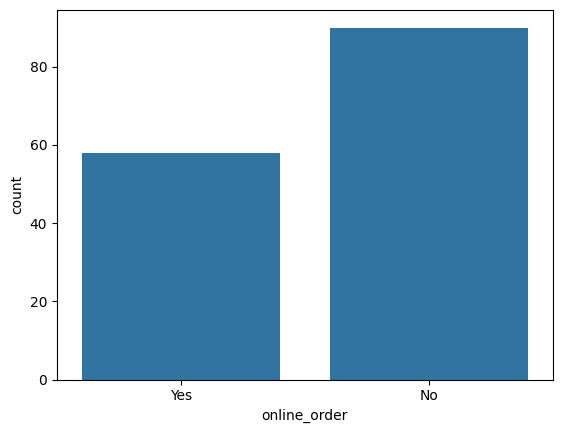

In [11]:
sns.countplot(x = data['online_order'])

**Conclusion:** This suggests that a majority of the restaurants do not accept online orders.

Explore the rate column.

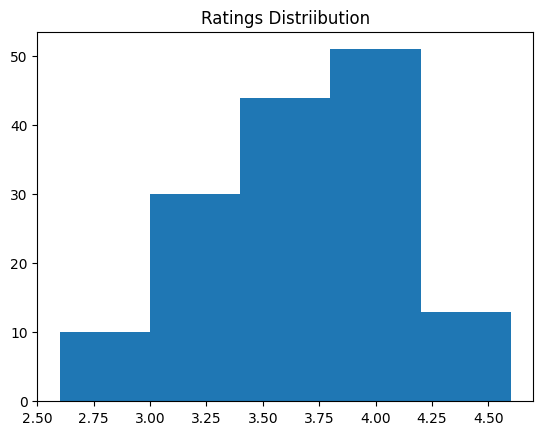

In [12]:
plt.hist(data['rate'], bins=5)
plt.title("Ratings Distriibution")
plt.show()

**Conclusion:** The majority of the restaurants received ratings ranging from 3.5 to 4.

Explore the approx_cost(for two people) column.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

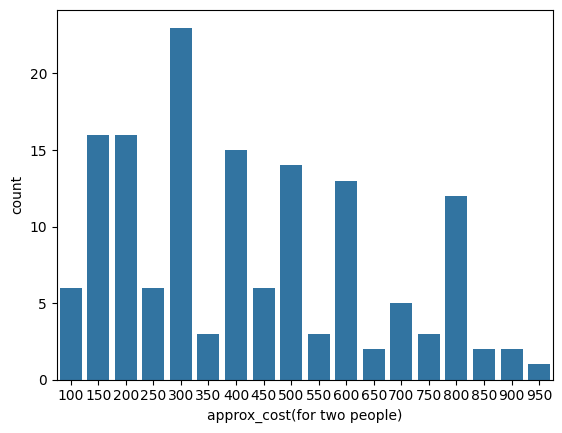

In [13]:
couple_data = data['approx_cost(for two people)']
sns.countplot(x=couple_data)

**Conclusion:** The majority of couples prefer restaurants with an approximate cost of **Rs. 300**.

Examine whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

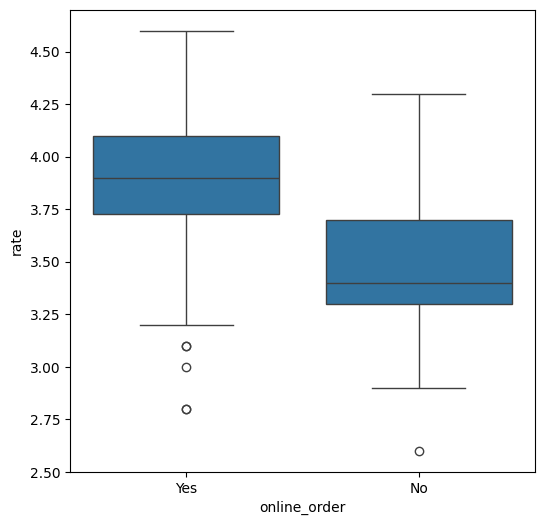

In [15]:
plt.figure(figsize = (6, 6))
sns.boxplot(x = 'online_order', y = 'rate', data = data)

**Conclusion:** Offline orders received lower ratings in comparison to offline orders, which obtained excellent ratings.

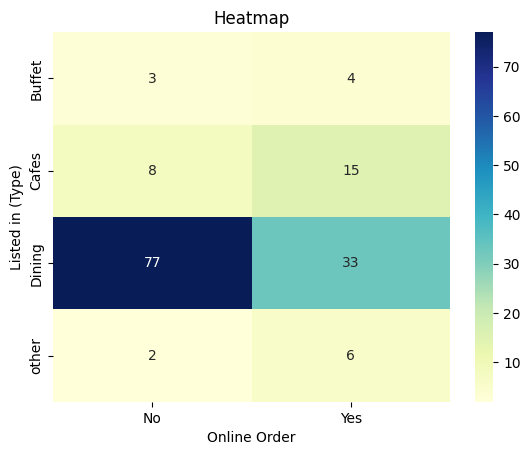

In [17]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

**Conclusion:** Dining restaurants primarily accept offine orders, whereas cafes primarily accepts online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.